<a href="https://colab.research.google.com/github/ellynnhitran/Facial-Expression-Recognition/blob/master/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!pip install -q keras

In [5]:
import keras

Using TensorFlow backend.


In [0]:
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


In [0]:
#------------------------------
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

In [8]:
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

with open("/content/drive/My Drive/Projects/emotion recognition /dataset/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [0]:
#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [0]:
#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
 try:
  emotion, img, usage = lines[i].split(",")

  val = img.split(" ")

  pixels = np.array(val, 'float32')

  emotion = tensorflow.keras.utils.to_categorical(emotion, num_classes)

  if 'Training' in usage:
   y_train.append(emotion)
   x_train.append(pixels)
  elif 'PublicTest' in usage:
   y_test.append(emotion)
   x_test.append(pixels)
 except:
  print("",end="")

In [11]:
#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [0]:
#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [0]:
#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=tensorflow.keras.optimizers.Adam()
    , metrics=['accuracy']
)


In [15]:
#------------------------------

fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
 model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
 model.load_weights('/content/drive/My Drive/Projects/emotion recognition /model/facial_expression_model_weights.h5') #load weights

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
256/256 [==============================] - 5s 19ms/step - loss: 1.7850 - accuracy: 0.2599
Epoch 2/5
256/256 [==============================] - 5s 18ms/step - loss: 1.5510 - accuracy: 0.3870
Epoch 3/5
256/256 [==============================] - 5s 18ms/step - loss: 1.3690 - accuracy: 0.4729
Epoch 4/5
256/256 [==============================] - 5s 18ms/step - loss: 1.2507 - accuracy: 0.5218
Epoch 5/5
256/256 [==============================] - 5s 18ms/step - loss: 1.1693 - accuracy: 0.5575


In [16]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

113/113 [==============================] - 0s 4ms/step - loss: 1.2144 - accuracy: 0.5366
Test loss: 1.2143974304199219
Test accuracy: 53.66397500038147


In [0]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  
  plt.show()

In [0]:
monitor_testset_results = False

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


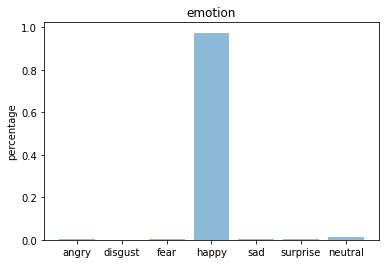

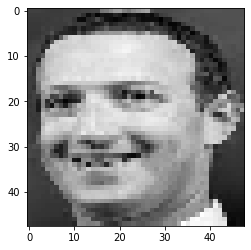

In [25]:
#make prediction for custom image out of test set

img = image.load_img("/content/drive/My Drive/Projects/emotion recognition /dataset/mark zukerberg test.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()